In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy import optimize
from IPython.core.debugger import Tracer
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

In [4]:
highp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.000,11.0,8.136583,62.589101
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.3,1.0,0.1,-0.092791,3525593.500,13.0,2.827470,148.814199
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.3,1.0,0.1,0.514770,9390406.000,9.0,7.979543,101.006870
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.3,1.0,0.1,0.328146,1644710.625,18.0,6.944855,694.485525
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.3,1.0,0.1,-0.220031,9468353.000,10.0,3.193649,76.039252


In [5]:
lowp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.1,1.0,0.1,0.077070,9268935.000,12.0,6.705383,51.579871
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.1,1.0,0.1,-0.092791,3525593.500,8.0,2.725320,143.437891
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.1,1.0,0.1,0.514770,9390406.000,12.0,10.749995,136.075885
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.1,1.0,0.1,0.328146,1644710.625,23.0,6.397114,639.711381
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.1,1.0,0.1,-0.220031,9468353.000,10.0,2.953130,70.312617


In [6]:
columns1=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
columns2=['num_planets','mass_planets','mass_efficiency']

hn = pd.DataFrame(columns=columns1)
ln = pd.DataFrame(columns=columns1)

rhn = pd.DataFrame(columns=columns2)
rln = pd.DataFrame(columns=columns2)


In [7]:
for i in range(len(columns1)):
    hn[columns1[i]]=highp_vars[columns1[i]]/max(highp_vars[columns1[i]])
    ln[columns1[i]]=lowp_vars[columns1[i]]/max(lowp_vars[columns1[i]])
for i in range(len(columns2)):
    rhn[columns2[i]]=highp_vars[columns2[i]]/max(highp_vars[columns2[i]])
    rln[columns2[i]]=lowp_vars[columns2[i]]/max(lowp_vars[columns2[i]])

In [8]:
hn.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


In [9]:
ln.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


In [10]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = len(columns1)
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        #Tracer()()
        self.yHat = self.forward(X) 
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1,dJdW2
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.

        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [74]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res


In [21]:
y=np.zeros((len(rhn['num_planets']),1))
for i in range(len(rhn['num_planets'])):
    y[i]=rhn['num_planets'][i]

In [22]:
x=np.zeros((len(hn),len(columns1)))
for i in range(len(columns1)-1):
    for j in range(0,len(hn[columns1[i]])):
        x[j,i]=hn[columns1[i]][j]

In [29]:
NN=Neural_Network()
T=trainer(NN)

In [31]:
T.train(x,y)

         Current function value: 20.808778
         Iterations: 200
         Function evaluations: 227
         Gradient evaluations: 227


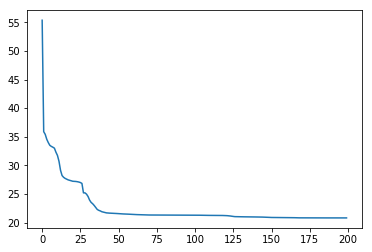

In [38]:
plt.plot(T.J)

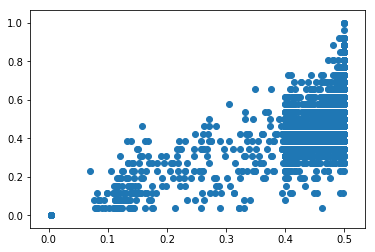

In [42]:
plt.scatter(NN.forward(x),y)

In [43]:
NN.forward(x)

array([[ 0.40101077],
       [ 0.48228326],
       [ 0.40019661],
       ..., 
       [ 0.00353632],
       [ 0.4613683 ],
       [ 0.49855473]])

In [44]:
y

array([[ 0.42307692],
       [ 0.5       ],
       [ 0.34615385],
       ..., 
       [ 0.        ],
       [ 0.38461538],
       [ 0.34615385]])

# lets train

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(hn, rhn, random_state=1)

In [55]:
x_train= X_train.as_matrix()
x_test = X_test.as_matrix()
y_train= Y_train.as_matrix()
y_test = Y_test.as_matrix()

In [56]:
Y_train.head()

,num_planets,mass_planets,mass_efficiency
2909,0.538462,0.000219,0.002427
1994,0.423077,0.086385,0.296126
635,0.346154,0.000091,0.003384
720,0.000000,0.000000,0.000000
254,0.653846,0.000177,0.001963


In [62]:
np.transpose(y_train[:,0]).reshape(len(y_train),1)

array([[ 0.53846154],
       [ 0.42307692],
       [ 0.34615385],
       ..., 
       [ 0.        ],
       [ 0.61538462],
       [ 0.46153846]])

In [63]:
T.train(x_train,np.transpose(y_train[:,0]).reshape(len(y_train),1))

         Current function value: 13.256206
         Iterations: 200
         Function evaluations: 219
         Gradient evaluations: 219


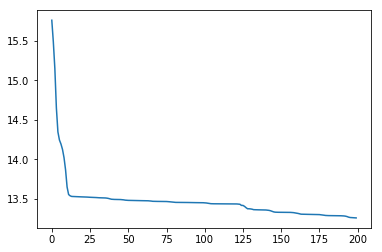

In [64]:
plt.plot(T.J)

(-0.034855006830200298,
 0.5348560599922999,
 -0.065176600441501115,
 1.0651766004415011)

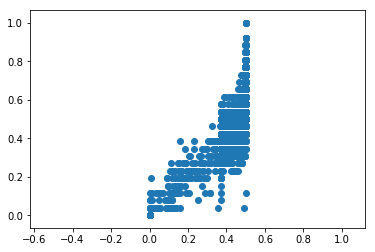

In [72]:
plt.scatter(NN.forward(x_train),y_train[:,0])
plt.axis('equal')

# real train

In [87]:
NN=Neural_Network()
T=trainer(NN)

In [88]:
T.train(x_train,np.transpose(y_train[:,0]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,0]).reshape(len(y_test),1))

         Current function value: 8.281236
         Iterations: 200
         Function evaluations: 209
         Gradient evaluations: 209


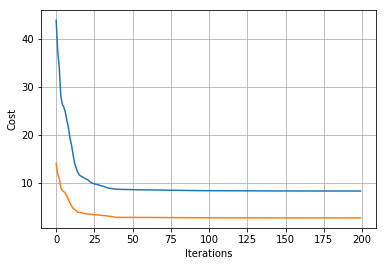

In [89]:
#Plot cost during training:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

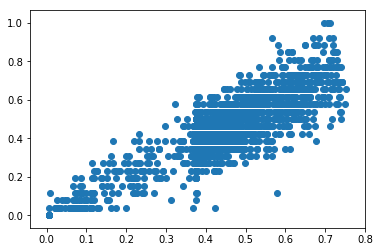

In [93]:
plt.scatter(NN.forward(x_train),y_train[:,0])